In [4]:
#import connexion
import base64
import numpy as np
import cv2
import os
from utils.model import NN


trained_model_location = 'model'
model = NN.load(trained_model_location)


def solve(image):
    nparr = np.fromstring(base64.b64decode(image), np.uint8)
    image = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    return model.solve(image)


In [5]:
import cv2
import base64
import requests
import numpy as np
from matplotlib import pyplot as plt

firstname = 'Антон'
lastname = 'Пастушенко'

url_ = 'https://is.fssp.gov.ru/ajax_search?callback=jQuery34003680614120948178_1606067804993&system=ip&is%5Bextended%5D=1&nocache=1&is%5Bvariant%5D=1&is%5Bregion_id%5D%5B0%5D=-1&is%5Blast_name%5D=' + lastname + '&is%5Bfirst_name%5D=' + firstname + '&is%5Bdrtr_name%5D=&is%5Bip_number%5D=&is%5Bpatronymic%5D=&is%5Bdate%5D=&is%5Baddress%5D=&is%5Bid_number%5D=&is%5Bid_type%5D%5B0%5D=&is%5Bid_issuer%5D=1'
url_bytes = url_.encode('utf-8')

headers = {
    'Referer' : url_bytes,
    'User-Agent' : 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.135 Safari/537.36'
}


byte_request = requests.get(url_, headers = headers)
str_request = str(byte_request.text)
img_bytes = str_request[str_request.find('data:'):str_request.rfind('" id=\\"capchaVisual')].split(',')[1]

def readb64(uri):
    nparr = np.fromstring(base64.b64decode(uri), np.uint8)
    img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    return img

image = readb64(img_bytes)
retval, buffer = cv2.imencode('.jpg', image)

context_cookie = byte_request.headers['set-cookie']
print(context_cookie)

connect.sid=s%3AjBYGSk1NNvSUqr96IhbYiymNueomJ-aw.SDTJzhhqCzMq0xxNZynFYsyVKQr7Z96mDMX5GRAxHKU; Path=/; HttpOnly


<ipython-input-5-8184c1811ed9>:24: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  nparr = np.fromstring(base64.b64decode(uri), np.uint8)


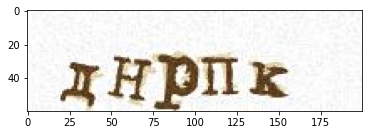

In [6]:
plt.imshow(image)

In [14]:
params = {'image': img_bytes}
code = solve(img_bytes)
print(code)

днрпк


<ipython-input-4-739ede61a156>:14: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  nparr = np.fromstring(base64.b64decode(image), np.uint8)


In [12]:
headers = {**headers, 'Cookie' : context_cookie}
content = requests.get(url_+"&code="+str(code), headers = headers)

In [13]:
content.text

'/**/ typeof jQuery34003680614120948178_1606067804993 === \'function\' && jQuery34003680614120948178_1606067804993({"data":"<div class=\\"iss\\">\\r\\n    \\r\\n    <div class=\\"results\\">\\r\\n        <div class=\\"context\\">\\r\\n            <div class=\\"search-found-total\\">\\r\\n                <div class=\\"search-found-total-inner\\">\\r\\n                    Найдено записей: <b>16</b>\\r\\n                    <div class=\\"corner\\"></div>\\r\\n                </div>\\r\\n            </div>\\r\\n        </div>\\r\\n        <div class=\\"results-frame\\">\\r\\n            <table class=\\"list border table alt-p05\\">\\r\\n                <tr>\\r\\n                    \\r\\n                        <th class=\\"left\\">\\r\\n                            \\r\\n                            Должник <span class=\\"small\\">(физ. лицо: ФИО, дата и место рождения; юр. лицо: наименование, юр. адрес, фактический адрес)</span>\\r\\n                            \\r\\n                      